In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import itertools
import os, stat, time
from os.path import dirname as up
import shutil
import glob
from PIL import Image

In [2]:
from glob import glob
data = glob('C:/Users/naima/OneDrive - Georgia State University/spring 2022-naimaspc/Data Mining/Project/dataset/**/*.png', recursive=True)


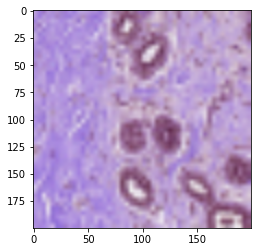

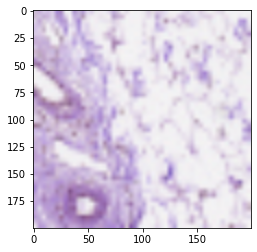

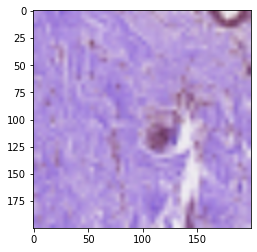

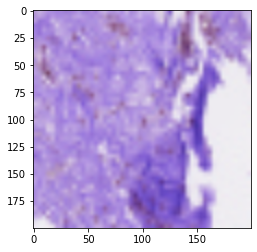

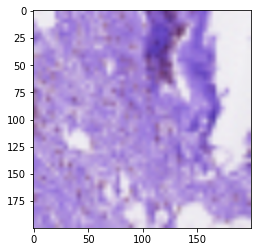

In [3]:
import cv2
import matplotlib.pyplot as plt
for i in data[:5]:
    img=cv2.imread(i)
    img_1=cv2.resize(img,(200,200))
    plt.imshow(img_1,cmap='binary')
    plt.show()

In [4]:
images=[]
labels=[]
for i in data[:15000]:
    if i.endswith('.png'):
        label=i[-5]
        img=cv2.imread(i)
        img_1=cv2.resize(img,(100,100))
        images.append(img_1)
        labels.append(label)

In [5]:
x=np.stack(images)

In [6]:
from tensorflow.keras.utils import to_categorical
y=to_categorical(labels)

In [7]:
#normalize the data
x=x/255

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

In [9]:
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization,Conv2D,MaxPool2D,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras import models, layers
def modelEfficientNetB0():
    
    model = models.Sequential()
    model.add(EfficientNetB0(include_top = False, weights = "imagenet",
                            input_shape=(100,100, 3)))
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Dense(2, activation = "sigmoid"))
    
    return model 
model = modelEfficientNetB0()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 4, 4, 1280)       4049571   
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 4,052,133
Trainable params: 4,010,110
Non-trainable params: 42,023
_________________________________________________________________


In [10]:
from tensorflow.keras.optimizers import Adam

opt = Adam(learning_rate=0.00001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['acc'])

In [11]:
history=model.fit(x,y,epochs=5,validation_split=0.4,batch_size=56)

Epoch 1/5
17/17 [==============================] - 45s 2s/step - loss: 0.6937 - acc: 0.5649 - val_loss: 0.6333 - val_acc: 0.8055
Epoch 2/5
17/17 [==============================] - 32s 2s/step - loss: 0.6573 - acc: 0.6688 - val_loss: 0.6103 - val_acc: 0.8055
Epoch 3/5
17/17 [==============================] - 31s 2s/step - loss: 0.6234 - acc: 0.7284 - val_loss: 0.6189 - val_acc: 0.8055
Epoch 4/5
17/17 [==============================] - 33s 2s/step - loss: 0.5845 - acc: 0.8182 - val_loss: 0.6202 - val_acc: 0.8055
Epoch 5/5
17/17 [==============================] - 32s 2s/step - loss: 0.5500 - acc: 0.8788 - val_loss: 0.6358 - val_acc: 0.8055


In [12]:
loss,accuracy=model.evaluate(x_test,y_test)

10/10 [==============================] - 2s 214ms/step - loss: 0.6051 - acc: 0.9094


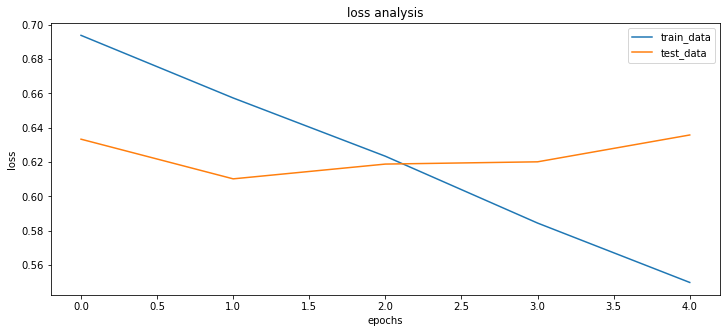

In [13]:
plt.figure(figsize=(12,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train_data','test_data'])
plt.title('loss analysis')
plt.show()

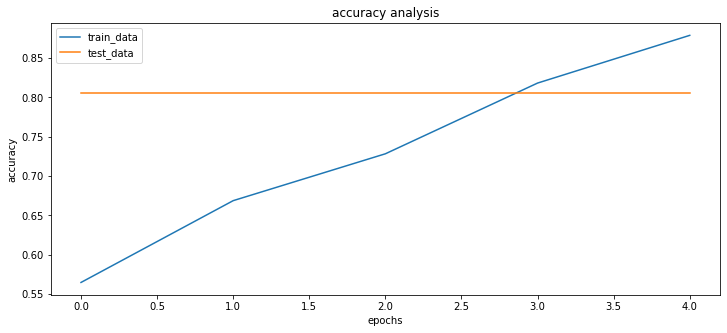

In [14]:
plt.figure(figsize=(12,5))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train_data','test_data'])
plt.title('accuracy analysis')
plt.show()



In [23]:
IMG = Image.open('C:/Users/naima/OneDrive - Georgia State University/spring 2022-naimaspc/Data Mining/Project/dataset/0/8918_idx5_x51_y601_class0.png')
print(type(IMG))
IMG = IMG.resize((100, 100))
IMG = np.array(IMG)
print('po array = {}'.format(IMG.shape))
IMG = np.true_divide(IMG, 255)
IMG = IMG.reshape(-1,100, 100,3)
print(type(IMG), IMG.shape)
# predictions = model.predict_classes(IMG)
predictions = np.argmax(model.predict(IMG), axis=-1)

print(model)
# predictions_c = model.predict_classes(IMG)
predictions_c = np.argmax(model.predict(IMG), axis=-1)

print(predictions, predictions_c)
# model.predict_classes(IMG)
model.predict(IMG)
print(predictions_c)

<class 'PIL.PngImagePlugin.PngImageFile'>
po array = (100, 100, 3)
<class 'numpy.ndarray'> (1, 100, 100, 3)
[0] [0]
[0]


In [24]:
classes = {'TRAIN': ['Non Malignant (No Cancer)','Malignant'],
           'TEST': ['Non Malignant (No Cancer)','Malignant']}

predicted_class = classes['TRAIN'][predictions_c[0]]
print('We think that is {}.'.format(predicted_class.lower()))

We think that is non malignant (no cancer).


In [25]:
# Save the Model Weights
model.save_weights('_model_.h5')

# Save the Model to JSON
model_json = model.to_json()
with open('_model_.json', 'w') as json_file:
    json_file.write(model_json)
    
print('Model saved to the disk.')

Model saved to the disk.
